In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
from victor import *
%matplotlib inline
plt.style.use('seaborn-talk')

In [2]:
with open('../config/example_model_input.yaml') as f:
    info = yaml.full_load(f)
    
model = info['model']
model['dir'] = os.path.dirname(os.getcwd())
ccfmodel = CCFModel(model)

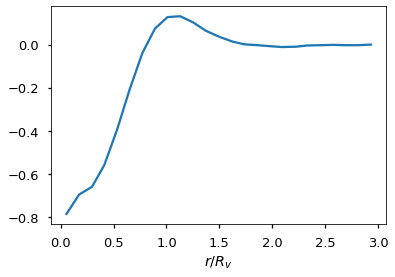

In [12]:
params = {'beta': 0.37, 'epsilon': 1.0}
ccfmodel.plot_realspace_multipoles(params, ell=0, **{'xlabel': r'$r/R_v$'})

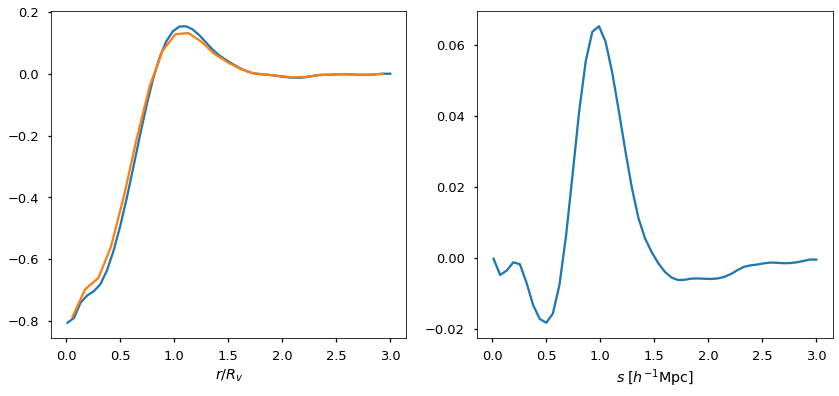

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
s = np.linspace(0.01, 3, 50)
ccfmodel.plot_model_multipoles(params, s=s, ax=ax1, ell=0)
ccfmodel.plot_realspace_multipoles(params, ell=0, ax=ax1, **{'xlabel': r'$r/R_v$'})
ccfmodel.plot_model_multipoles(params, s=s, ax=ax2, ell=2)

In [2]:
with open('../config/example_boss_input.yaml') as f:
    info = yaml.full_load(f)
    
model = info['model']
model['dir'] = os.path.dirname(os.getcwd())
data = info['data']
data['dir'] = os.path.dirname(os.getcwd())
ccfmodel = CCFModel(model)
ccf = CCFFit(model, data)

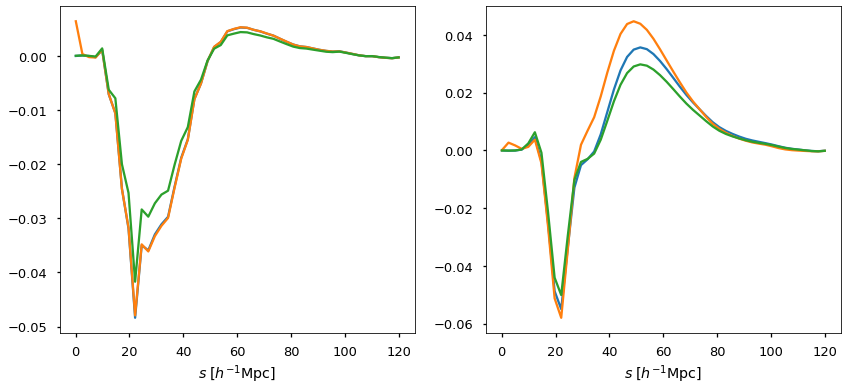

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
params1 = {'fsigma8': 0.47, 'beta': 0.31, 'sigma_v': 350, 'aperp': 1, 'apar': 1}
params2 = {'fsigma8': 0.47, 'beta': 0.31, 'sigma_v': 350, 'aperp': 1, 'apar': 1, 'options': {'assume_isotropic_realspace': False}}
params3 = {'fsigma8': 0.4, 'beta': 0.37, 'sigma_v': 350, 'aperp': 1, 'apar': 1}
s = np.linspace(0.1, 120, 50)
ccfmodel.plot_model_multipoles(params1, params2, params3, s=s, ax=ax1, ell=0, diff=True)
ccfmodel.plot_model_multipoles(params1, params2, params3, s=s, ax=ax2, ell=2)

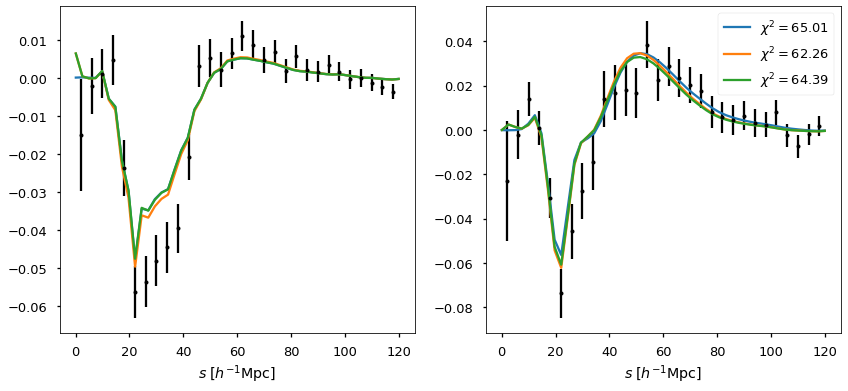

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
params1 = {'fsigma8': 0.47, 'beta': 0.37, 'sigma_v': 380, 'aperp': 1, 'apar': 1}
params2 = {'fsigma8': 0.49, 'beta': 0.37, 'sigma_v': 380, 'aperp': 1, 'apar': 1, 'options': {'assume_isotropic_realspace': False}}
params3 = {'fsigma8': 0.47, 'beta': 0.37, 'sigma_v': 380, 'aperp': 1, 'apar': 1, 'options': {'assume_isotropic_realspace': False}}
s = np.linspace(0.1, 120, 50)
ccf.plot_multipole_comparison(params1, params2, params3, s=s, ax=ax1, ell=0, diff=True)
ccf.plot_multipole_comparison(params1, params2, params3, s=s, ax=ax2, ell=2, **{'chi2': True})
ax2.legend()

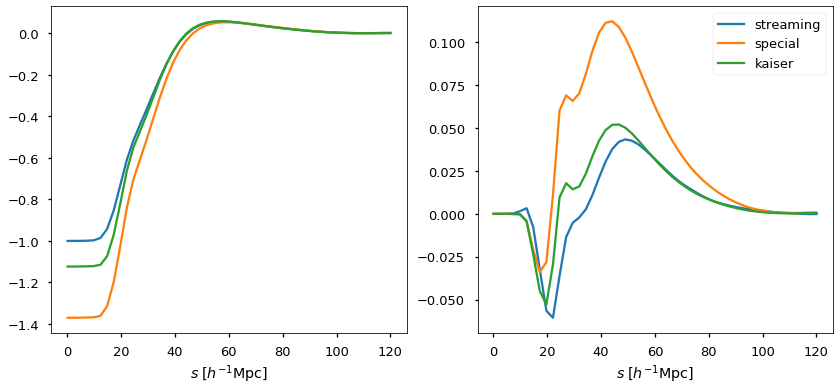

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
params1 = {'fsigma8': 0.47, 'beta': 0.37, 'sigma_v': 350, 'aperp': 1, 'apar': 1, 'options': {'matter_model': 'linear_bias'}, 'label': 'streaming'}
params2 = {'fsigma8': 0.47, 'beta': 0.37, 'sigma_v': 350, 'aperp': 1, 'apar': 1, 'options': {'rsd_model': 'euclid_special', 'matter_model': 'linear_bias'}, 'label': 'special'}
params3 = {'fsigma8': 0.47, 'beta': 0.37, 'sigma_v': 350, 'aperp': 1, 'apar': 1, 'options': {'rsd_model': 'kaiser', 'kaiser_coord_shift': True, 'kaiser_approximation': True, 'matter_model': 'linear_bias'}, 'label': 'kaiser'}
s = np.linspace(0.1, 120, 50)
ccfmodel.plot_model_multipoles(params1, params2, params3, s=s, ax=ax1, ell=0)
ccfmodel.plot_model_multipoles(params1, params2, params3, s=s, ax=ax2, ell=2)
ax2.legend()

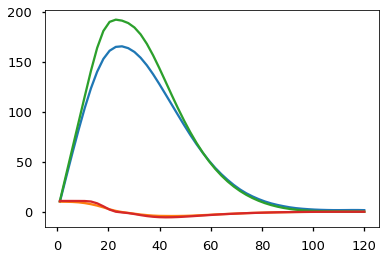

In [43]:
vr, dvr = ccfmodel.velocity_terms(s, params1)
plt.plot(s, vr)
plt.plot(s, dvr)
vr, dvr = ccfmodel.velocity_terms(s, params1, **{'matter_model': 'linear_bias'})
plt.plot(s, vr)
plt.plot(s, dvr)

In [32]:
xi_r = np.loadtxt('/Users/seshadri/libraries/Notes/reference_data/xi_r_Hamaus2020_Patchy.txt')

import h5py

with h5py.File('../data/example_data/example_void_model.hdf5', 'w') as f:
    f.create_dataset('r', data=xi_r[:, 0])
    f.create_dataset('monopole', data=xi_r[:, 1])
    bias = (2 + 0.5 * np.sinc(xi_r[:, 0]))
    f.create_dataset('rdelta', data=xi_r[:, 0])
    f.create_dataset('delta', data=(xi_r[:, 1] / bias))
    f.create_dataset('rsv', data=(sv['rvals'] / 52))
    f.create_dataset('sigmav', data=sv['sigma_v_los'])
                     

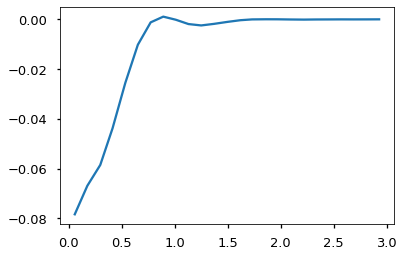

In [27]:
xi_r = np.loadtxt('/Users/seshadri/libraries/Notes/reference_data/xi_r_Hamaus2020_Patchy.txt')
bias = (2 + 0.5 * np.sinc(xi_r[:, 0]))
# plt.plot(xi_r[:, 0], bias)
# plt.plot(xi_r[:,0], xi_r[:, 1])
# plt.plot(xi_r[:,0], xi_r[:, 1] / 2)
plt.plot(xi_r[:,0], xi_r[:, 1] / 2 - xi_r[:, 1] / bias)

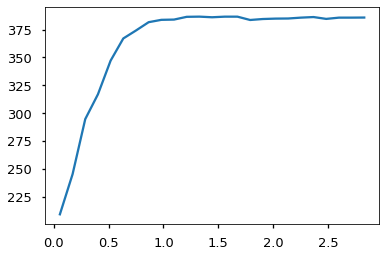

In [30]:
sv = np.load('/Users/seshadri/libraries/void-galaxy-cosmo-fitter/data/BOSS_DR12_CMASS_data/old _format/cmass_combined_recon_zobov-Voids_velocity-profiles_R0.50.npy', allow_pickle=True).item()
plt.plot(sv['rvals'] / 52, sv['sigma_v_los'])

In [15]:


mu_vals = np.linspace(1e-10, 1)
mu_integral = np.trapz(np.sqrt(1 + (1 - mu_vals**2) * (1.0**2 - 1)), mu_vals)
reference_r = ccfmodel.r
rescaled_r = reference_r * mu_integral
# real-space correlation
ccf_mult = ccfmodel.get_interpolated_real_multipoles(0.37)
real_multipoles  = {}
for i, ell in enumerate(ccfmodel.poles_r):
    real_multipoles[f'{ell}'] = InterpolatedUnivariateSpline(rescaled_r, ccf_mult[i], ext=3)

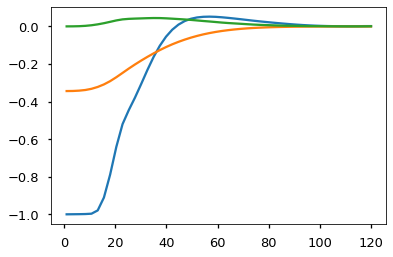

In [6]:
from scipy.interpolate import InterpolatedUnivariateSpline
_spline = InterpolatedUnivariateSpline

x = 0
s = np.linspace(1, 120, 50)
mu = np.linspace(0, 1, 100)
S, Mu, X = np.meshgrid(s, mu, x)

beta = params1['beta']
epsilon = 1.0
apar = 1.0
        
mu_vals = np.linspace(1e-10, 1)
mu_integral = np.trapz(apar * np.sqrt(1 + (1 - mu_vals**2) * (epsilon**2 - 1)), mu_vals)
reference_r = ccfmodel.r
rescaled_r = reference_r * mu_integral
ccf_mult = ccfmodel.get_interpolated_real_multipoles(beta)
real_multipoles  = {}
for i, ell in enumerate(ccfmodel.poles_r):
    real_multipoles[f'{ell}'] = _spline(rescaled_r, ccf_mult[i], ext=3)
reference_r = np.append([0], ccfmodel.r)
rescaled_r = reference_r * mu_integral
vr, dvr = ccfmodel.velocity_terms(reference_r, params1)
vr_interp = _spline(rescaled_r, vr, ext=0)
dvr_interp = _spline(rescaled_r, dvr, ext=0)

mu_s = Mu
mu_s[Mu>0] = 1 / np.sqrt(1 + epsilon**2 * (1 / Mu[Mu>0]**2 - 1))
s_perp = S * np.sqrt(1 - mu_s**2) * params1.get('aperp', 1.0)
s_par = S * mu_s * params1.get('apar', 1.0)
s = np.sqrt(s_par**2 + s_perp**2) # note this is no longer same as the input!
        
M = 1
Q = 1

r_par = s_par
r = np.sqrt(s_perp**2 + r_par**2)
mu_r = r_par / r
xi_rmu = real_multipoles['0'](r)

plt.plot(r[0, :, 0], xi_rmu[0, :, 0])
plt.plot(r[0, :, 0], (-3*vr_interp(r)*ccfmodel.iaH/r)[0, :, 0])
plt.plot(r[0, :, 0], (-2*Q*mu_r**2*ccfmodel.iaH*(dvr_interp(r) - vr_interp(r)/r))[50, :, 0])
# plt.plot(s, (xi_rmu - 3*vr*ccfmodel.iaH/s - 2*mu_r**2*self.iaH*(dvr_interp(r) - vr_interp(r)/r)))


In [7]:
vr

array([  0.        ,  20.08710906,  59.85831114,  97.61574738,
       129.94031359, 153.140513  , 164.25841633, 165.42464317,
       160.38936533, 150.01806236, 135.60227368, 118.99915594,
       101.92344181,  85.02093466,  69.22415024,  55.24556706,
        43.16970183,  33.20704334,  24.86824733,  18.3199718 ,
        13.39495493,   9.56824177,   6.82827101,   4.79118454,
         3.38834651,   2.54262215,   1.97354468,   1.67424116,
         1.59109239,   1.67679062,   1.67303473])